#Mental Health in Tech Survey

Educational dataset collecting responses from tech workers about mental health at work.

📌 ~1260 responses (rows) + ~27 columns on: age, gender, country, family history, seeking treatment, company benefits, and attitude toward mental health, etc.

🧠 This dataset comes from an open survey by Open Sourcing Mental Illness (OSMI) and is used for data cleaning, exploratory analysis, machine learning, and other similar tasks.


Using the Mental Health dataset and what you have learn this week, answer the following questions:

1.   What is the distribution of mental health conditions among different age groups in the tech industry?
2.   How does the frequency of mental health issues vary by gender?
3. Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

---
The variable **"treatment"**  is a dichotomous Y/N variable used as a proxy for "mental health condition" (it is not a clinical diagnosis, but rather a search for treatment).

Segmentation will be based on:
* age --> age_group
* gender --> gender_group_clean
* countries

In [146]:
# == Libraries imported==

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

from sklearn.impute import SimpleImputer

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

In [147]:
# Upload dataset from local machine
uploaded = files.upload()

Saving survey.csv to survey (2).csv


In [148]:
# Load csv file into a DataFrame
survey_raw = pd.read_csv('survey.csv')

In [149]:

# === Preview first rows ===
survey_raw.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#Basic dataset information


In [150]:
# shape - how big is the data?
print(f'Size: {survey_raw.shape[0]} rows x  {survey_raw.shape[1]} columns')

Size: 1259 rows x  27 columns


In [151]:
# info() - what data types? what's missing?
survey_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [152]:
# describe() - statistics for numeric columns
print(f'\nSummary statistics: {survey_raw.describe()}')

#This already tells there's something weird going with Age


Summary statistics:                 Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [153]:
print(f'\nColumns names: {survey_raw.columns}')

# It is advisable to harmonize the names of 'Timestamp', 'Age', 'Gender', 'Country' in lowercase


Columns names: Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [154]:
print(f'\nData types: {survey_raw.dtypes}')

#essential to convert many Data Types


Data types: Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object


In [155]:
# Create working copy:
df = survey_raw.copy()

In [156]:
# 'Timestamp', 'Age', 'Gender', 'Country' = lowercase

df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [157]:
# Count duplicates:
print(f'\nDuplicate rows: {df.duplicated().sum()}')


Duplicate rows: 0


In [158]:
# === MISSING VALUE ANALYSIS ===
print(f'\nMissing values:{df.isna().sum()}')


Missing values:timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [159]:
missing_counts = df.isnull().sum()
missing_pct = ((missing_counts / len(df)) * 100).round(1)

missing_df = pd.DataFrame(
    {
        'Missing Count': missing_counts,
        'Missing %': missing_pct
    }
)

missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)

,Missing Count,Missing %
comments,1095,87.0
state,515,40.9
work_interfere,264,21.0
self_employed,18,1.4


In [160]:
# comments	87.0        → DROP COLUMN   --> NO!! "No comment" is completed in the missing fields.
# state	 40.9           → DROP COLUMN   --> NO!! # Moda para USA donde antes había NA y “Not USA” para todos los demás países
# work_interfere 21.0   → IMPUTE    -->  Mode for USA in descriptive NA and “Not USA” for all other countries
# self_employed  	1.4   → IMPUTE with mode

In [161]:
# Treatment of the "comments" variable

In [162]:
#convert to string type
df['comments'] = df['comments'].astype('string')
df['comments'].dtype

string[python]

In [163]:
print('Example Comments:\n', df['comments'].dropna().sample(5).tolist())

Example Comments:
 ['Fully remote developer', 'To be self employed helps but also brings you in touch with lots of new people that you might have to explain yourself to.', "Though it doesn't affect me (male) good job for making the Gender field a text input instead of a drop down of only two options.", "The company I work for was started by engineers and so anything other then the engineering department has always lacked a bit. Now that we've grown things are better but I feel that overall our total benefits package (including healthcare) isn't well communicated. This reflects negatively on the mental health questions above but would also reflect negatively on any other sort of survey about the benefits. That is I don't think the company is purposefully doing less for mental health. They just aren't doing enough across the board and that includes mental health.", 'Many of these questions were difficult to answer as a self-employed person; I did my best with the available options.']


In [164]:
# fill the missing comments
df['comments'] = df['comments'].fillna('No comment')

In [165]:
# Treatment of the "state" variable

In [166]:
# copy state_clean form state
# state_clean has:
  # Mode for USA where there used to be NA
  # “Not USA” for all other countries

# Create a new column based on the original
df['state_clean'] = df['state']

# Filter on United States
usa_states = df[df['country'] == 'United States']['state_clean']

# Calculate mode
mode_state = usa_states.mode()[0]
print("US Mode:", mode_state)    # CA --> Many responses from Silicon Valley and tech areas

# Replace NA / empty values ​​in US with the mode
df.loc[(df['country'] == 'United States') & (df['state_clean'].isnull() | (df['state_clean'] == 'NA')), 'state_clean'] = mode_state

# Replace non-USA states with 'Not USA'
df.loc[df['country'] != 'United States', 'state_clean'] = 'Not USA'

#Convert to categorical
df['state_clean'] = df['state_clean'].astype('category')

# Verification
print(" n° 'NA' en state_clean:", (df['state_clean'] == 'NA').sum())
print("DataType:", df['state_clean'].dtype)

US Mode: CA
 n° 'NA' en state_clean: 0
DataType: category


In [167]:
# feasible to eliminate state!
df.drop(columns=['state'], inplace=True)

In [168]:
#work_interfere & self_employed' = replacement by Mode

In [169]:
df['work_interfere'].mode()[0]

'Sometimes'

In [170]:
# === FILL CATEGORICAL COLUMNS ===
print(f"work_interfere missing before: {df['work_interfere'].isnull().sum()}")
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

#Convert to categorical
df['work_interfere'] = df['work_interfere'].astype('category')
print(f"work_interfere missing after: {df['work_interfere'].isnull().sum()}")


work_interfere missing before: 264
work_interfere missing after: 0


In [171]:
df['self_employed'].mode()[0]

# Most employees are in a dependent employment relationship

'No'

In [172]:
# === FILL CATEGORICAL COLUMNS ===
print(f"self_employed before: {df['self_employed'].isnull().sum()}")
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

#Convert to categorical
df['self_employed'] = df['self_employed'].astype('category')
print(f"self_employed missing after: {df['self_employed'].isnull().sum()}")

self_employed before: 18
self_employed missing after: 0


In [173]:
# Last check for missings

missing_counts = df.isnull().sum()
missing_pct = ((missing_counts / len(df)) * 100).round(1)

missing_df = pd.DataFrame(
    {
        'Missing Count': missing_counts,
        'Missing %': missing_pct
    }
)

missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)

,Missing Count,Missing %


In [174]:
# Timestamp to  datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['timestamp'].dtype

# dtype('<M8[ns]')   == datetime64[ns]

dtype('<M8[ns]')

In [175]:
#Tratamiento de variable "age":  Las edades 'raras' son reemplazadas por la mediana si son menores de 18, mayores de 70 o si hay errores en la digitacion

In [176]:
by_age = df['age'].value_counts().sort_index()
by_age

,count
age,
-1726,1
-29,1
-1,1
5,1
8,1
11,1
18,7
19,9
20,6


In [177]:
# Convert out-of-range ages to NaN
df.loc[(df['age'] < 18) | (df['age'] > 70), 'age'] = np.nan

#View the median BEFORE imputing
median_age = df['age'].median()
print("Median age:", median_age)    # --> 31 years is perfectly logical in the tech industry

Median age: 31.0


In [178]:
# create imputor with median

age_imputer = SimpleImputer(strategy='median')
df['age'] = age_imputer.fit_transform(df[['age']]).astype(int)

print(f'How many NAN remained??: {df['age'].isnull().sum()} ' )


How many NAN remained??: 0 


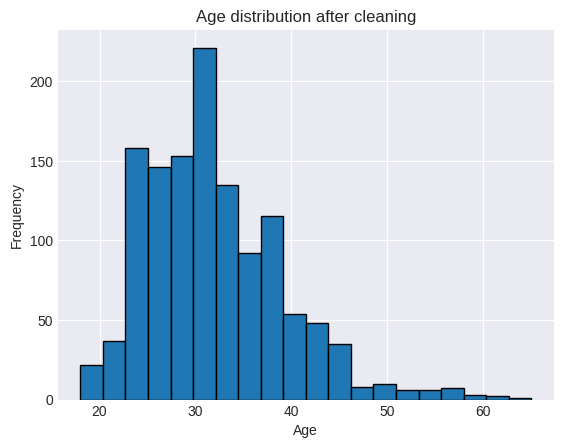

In [179]:
# Distribution check on age

plt.hist(df['age'], bins = 20, edgecolor = 'black')
plt.title('Age distribution after cleaning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [180]:
df['age'].describe()

,age
count,1259.000000
mean,32.037331
std,7.177803
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,65.000000


In [181]:
# Create age groups

bins = [17, 25, 35, 45, 55, 70]
labels = ["18-25", "26-35", "36-45", "46-55", "56-70"]

# Create new column 'age_group'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)   #right=True → el límite superior está incluido (por ejemplo, 25 entra en "18-25").

# Verify
df[['age', 'age_group']].head(10)

,age,age_group
0,37,36-45
1,44,36-45
2,32,26-35
3,31,26-35
4,31,26-35
5,33,26-35
6,35,26-35
7,39,36-45
8,42,36-45
9,23,18-25


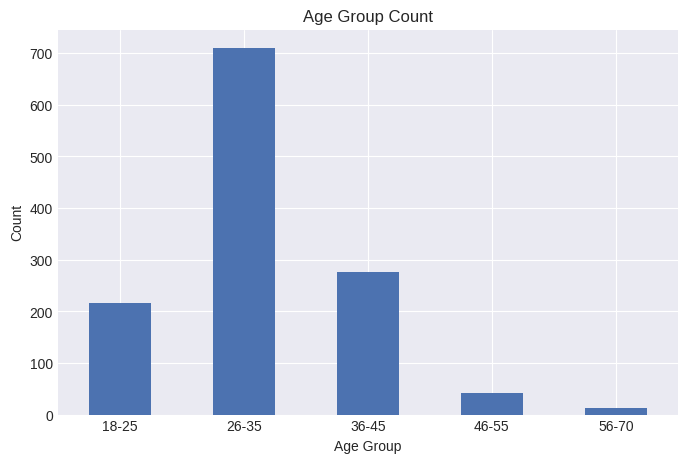

In [182]:
# Count and graph to check age groups

age_counts = df['age_group'].value_counts().sort_index()

age_counts.plot(kind='bar', figsize=(8,5), color='#4c72b0')

plt.title('Age Group Count')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [183]:
df[df['age_group'].isnull()][['age', 'age_group']]

,age,age_group


In [184]:
# Gender treatment (mapping)

In [185]:
#lowercase descriptions
df['gender'] = df['gender'].str.strip().str.lower()

by_gender = df['gender'].value_counts().sort_index()
by_gender

,count
gender,
a little about you,1
agender,1
all,1
androgyne,1
cis female,1
cis male,3
cis man,1
cis-female/femme,1
enby,1


In [186]:
#Standardized gender map creation

gender_map = {

    # Male
    'male': 'Male', 'm': 'Male', 'make': 'Male', 'cis male': 'Male', 'man': 'Male', 'cis man': 'Male',
    'guy (-ish) ^_^': 'Male', 'mail': 'Male', 'maile': 'Male', 'mal': 'Male', 'male (cis)': 'Male',
    'male leaning androgynous': 'Male', 'male-ish': 'Male', 'malr': 'Male', 'msle': 'Male',
    'ostensibly male, unsure what that really means': 'Male', 'something kinda male?': 'Male',

    # Female
    'female': 'Female', 'f': 'Female', 'woman': 'Female', 'female (trans)': 'Female', 'cis female': 'Female',
    'cis-female/femme': 'Female', 'femail': 'Female', 'femake': 'Female', 'female (cis)': 'Female',
    'trans woman': 'Female', 'trans-female': 'Female',

    # Others
    'a little about you': 'Others', 'agender': 'Others', 'all': 'Others', 'androgyne': 'Others',
    'enby': 'Others', 'fluid': 'Others', 'genderqueer': 'Others', 'nah': 'Others', 'neuter': 'Others',
    'non-binary': 'Others', 'p': 'Others', 'queer': 'Others', 'queer/she/they': 'Others'
}

# Apply mapping to a new 'gender_clean' column
df['gender_clean'] = df['gender'].map(gender_map)

# Convert to categorical
df['gender_clean'] = df['gender_clean'].astype('category')

# Check if any values ​​remain unmapped
if df['gender_clean'].isnull().any():
    print("Some values ​​were not mapped correctly:")
    print(df[df['gender_clean'].isnull()])
else:
    print("All values ​​were correctly classified.")


All values ​​were correctly classified.


In [187]:
print("===== Male =====")
print(df[df['gender_clean'] == 'Male']['gender'].unique(), "\n")

print("===== Female =====")
print(df[df['gender_clean'] == 'Female']['gender'].unique(), "\n")

print("===== Others =====")
print(df[df['gender_clean'] == 'Others']['gender'].unique(), "\n")

===== Male =====
['m' 'male' 'male-ish' 'maile' 'something kinda male?' 'cis male' 'mal'
 'male (cis)' 'make' 'guy (-ish) ^_^' 'male leaning androgynous' 'man'
 'msle' 'mail' 'malr' 'cis man'
 'ostensibly male, unsure what that really means'] 

===== Female =====
['female' 'trans-female' 'cis female' 'f' 'woman' 'femake'
 'cis-female/femme' 'trans woman' 'female (trans)' 'female (cis)' 'femail'] 

===== Others =====
['queer/she/they' 'non-binary' 'nah' 'all' 'enby' 'fluid' 'genderqueer'
 'androgyne' 'agender' 'neuter' 'queer' 'a little about you' 'p'] 



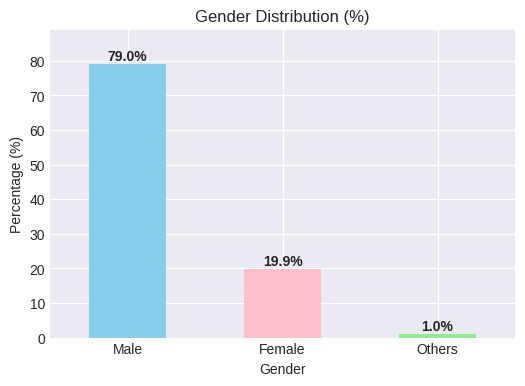

In [188]:
gender_counts = df['gender_clean'].value_counts()
gender_percent = gender_counts / gender_counts.sum() * 100

plt.figure(figsize=(6,4))
gender_percent.plot(kind='bar', color=['skyblue', 'pink', 'lightgreen'])
plt.title('Gender Distribution (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Add the values ​​above each bar
for i, v in enumerate(gender_percent):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.ylim(0, gender_percent.max() + 10)
plt.show()

In [189]:
# feasible to eliminate gender!

df.drop(columns=['gender'], inplace=True)

In [190]:
print(f'\nData types: {df.dtypes}')


Data types: timestamp                    datetime64[ns]
age                                   int64
country                              object
self_employed                      category
family_history                       object
treatment                            object
work_interfere                     category
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview              object
phys_health_interview                object
mental_vs_physical 

Age Group Distribution of Mental Health Conditions: 
 treatment    No   Yes
age_group            
18-25      51.6  48.4
26-35      51.1  48.9
36-45      44.8  55.2
46-55      42.9  57.1
56-70      38.5  61.5


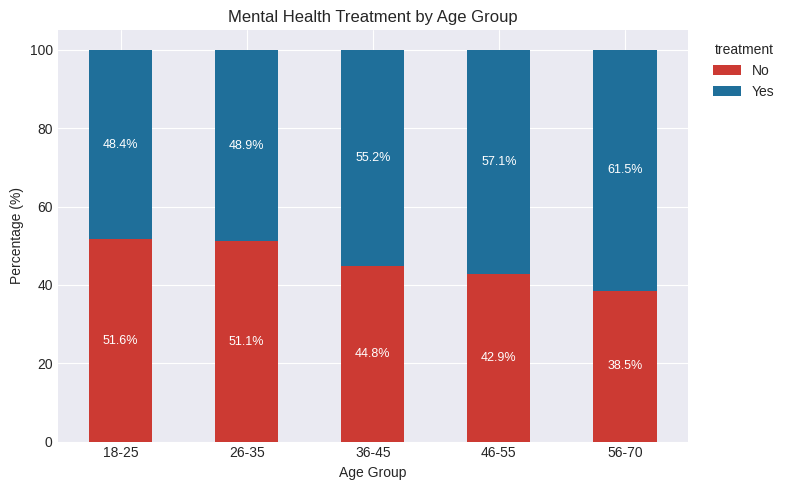

Younger groups have higher treatment rates; older cohorts, the lowest.
The difference could be explained by cultural and generational factors.


In [191]:
# Question 1:
#  == What is the distribution of mental health conditions among different age groups in the tech industry? ==

age_group_dist = pd.crosstab(
    df['age_group'],
    df['treatment'],
    normalize='index'
) * 100

age_group_dist = age_group_dist.round(1)

print(f'Age Group Distribution of Mental Health Conditions: \n', age_group_dist)

#graph
age_group_dist = pd.crosstab(
    df['age_group'],
    df['treatment'],
    normalize='index'
) * 100

age_group_dist = age_group_dist.round(1)

# Professional colors (subdued tones)
colors = {
    'No':  '#cc3a33',
    'Yes': '#1f6f9a'
}

# Sort columns (Not below, Yes above)
age_group_dist = age_group_dist[['No', 'Yes']]

# Plot
fig, ax = plt.subplots(figsize=(8,5))

age_group_dist.plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in age_group_dist.columns],
    ax=ax
)

# percentages inside the bars
for i, age_group in enumerate(age_group_dist.index):
    cumulative = 0
    for treatment in age_group_dist.columns:
        value = age_group_dist.loc[age_group, treatment]
        if value > 0:
            ax.text(
                i,
                cumulative + value / 2,
                f"{value:.1f}%",
                ha='center',
                va='center',
                color='white',
                fontsize=9
            )
            cumulative += value

ax.set_title('Mental Health Treatment by Age Group', fontsize=12)
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Age Group')
ax.set_xticklabels(age_group_dist.index, rotation=0)

# legend out
ax.legend(title='treatment', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

# some conclusions
print('Younger groups have higher treatment rates; older cohorts, the lowest.')
print('The difference could be explained by cultural and generational factors.')

Gender Distribution of Mental Health Conditions:
 treatment       No   Yes
gender_clean            
Female        31.1  68.9
Male          54.6  45.4
Others         7.7  92.3

n_others: 13



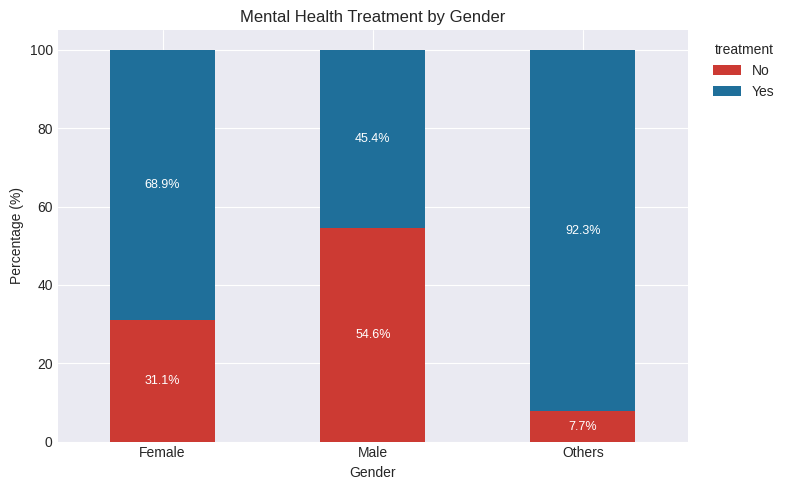

Women report seeking treatment more frequently than men (probably explained by cultural factors, underreporting, and stigma).
 "Other" category shows high rates, but the sample size (n = 13) is small; it should be interpreted with caution.


In [192]:
# Question 2:
#   == How does the frequency of mental health issues vary by gender? ==

gender_dist = pd.crosstab(
    df['gender_clean'],
    df['treatment'],
    normalize='index'
) * 100

gender_dist = gender_dist.round(1)

print('Gender Distribution of Mental Health Conditions:\n', gender_dist)
print()
print(f'n_others: {df['gender_clean'].value_counts()['Others']}')
print()

colors = {
    'No':  '#cc3a33',
    'Yes': '#1f6f9a'
}

# Sort columns (Not below, Yes above)
gender_dist = gender_dist[['No', 'Yes']]

# graph
fig, ax = plt.subplots(figsize=(8,5))

gender_dist.plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in gender_dist.columns],
    ax=ax
)

# percentages inside the bars
for i, gender in enumerate(gender_dist.index):
    cumulative = 0
    for treatment in gender_dist.columns:
        value = gender_dist.loc[gender, treatment]
        if value > 0:
            ax.text(
                i,
                cumulative + value / 2,
                f"{value:.1f}%",
                ha='center',
                va='center',
                color='white',
                fontsize=9
            )
            cumulative += value

ax.set_title('Mental Health Treatment by Gender', fontsize=12)
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Gender')
ax.set_xticklabels(gender_dist.index, rotation=0)

# legend out
ax.legend(title='treatment', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Some conclusions
print('Women report seeking treatment more frequently than men (probably explained by cultural factors, underreporting, and stigma).')
print(' "Other" category shows high rates, but the sample size (n = 13) is small; it should be interpreted with caution.')




country
United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64


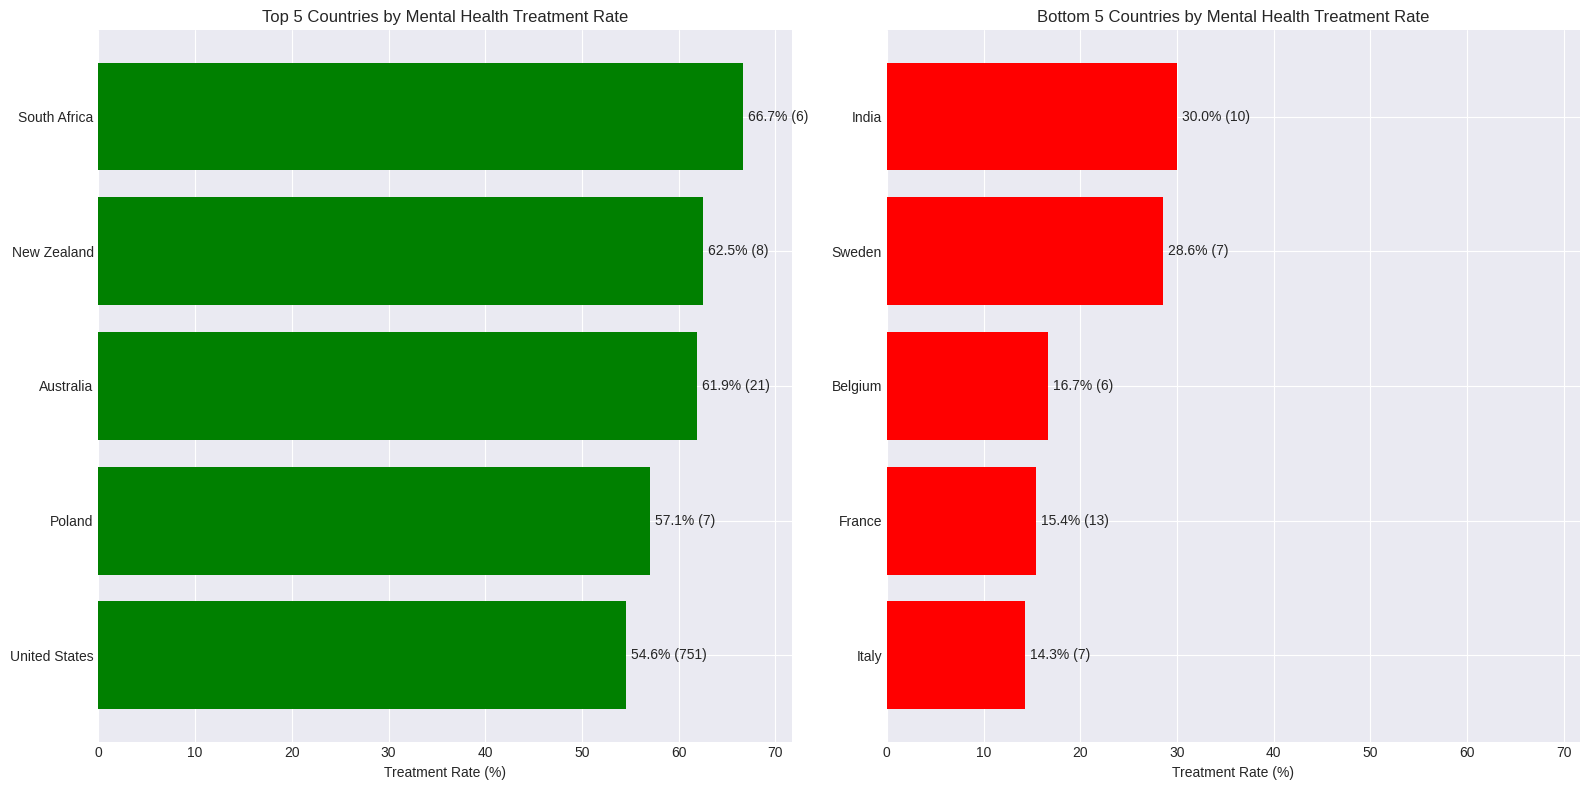

In [193]:
# Question 3:
#   == Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry. =='

# To carry out this task, it is decided to Filter countries with sufficient sample size (to avoid misleading rankings)

# Count responses per country
country_counts = df['country'].value_counts()
print(country_counts.head(10))

  # United States     751
  # United Kingdom    185
  # Canada             72
  # Germany            45
  # Netherlands        27
  # Ireland            27
  # Australia          21
  # France             13
  # India              10
  # New Zealand         8


# Filter countries with at least 6 responses
valid_countries = country_counts[country_counts >= 6].index
df_filtered = df[df['country'].isin(valid_countries)]


# Recalculate counts after filtering
country_counts_filtered = df_filtered['country'].value_counts()

# treatment rate (%)
country_dist = (
    df_filtered
        .groupby('country')['treatment']
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
).round(1)


# Sselect top 5 / bottom 5 countries
top_5 = country_dist.sort_values(by='Yes', ascending=False).head(5)
bottom_5 = country_dist.sort_values(by='Yes', ascending=True).head(5)


# Get corresponding n
top_5_counts = country_counts_filtered[top_5.index]
bottom_5_counts = country_counts_filtered[bottom_5.index]

# Set max x-axis for consistent scaling
x_max = max(top_5['Yes'].max(), bottom_5['Yes'].max()) + 5

# === Plot Top & Bottom 5 in Subplots ===
fig, axes = plt.subplots(1, 2, figsize=(16,8), sharey=False)

# --- Top 5 subplot (left) ---
axes[0].barh(top_5.iloc[::-1].index, top_5['Yes'].iloc[::-1], color='green')
axes[0].set_xlabel('Treatment Rate (%)')
axes[0].set_title('Top 5 Countries by Mental Health Treatment Rate')
axes[0].set_xlim(0, x_max)

for i, n in enumerate(top_5_counts.iloc[::-1]):
    width = top_5['Yes'].iloc[::-1].values[i]
    axes[0].text(width + 0.5, i, f'{width:.1f}% ({n})', va='center')

# --- Bottom 5 subplot (right) ---
axes[1].barh(bottom_5.index, bottom_5['Yes'], color='red')
axes[1].set_xlabel('Treatment Rate (%)')
axes[1].set_title('Bottom 5 Countries by Mental Health Treatment Rate')
axes[1].set_xlim(0, x_max)

for i, n in enumerate(bottom_5_counts):
    width = bottom_5['Yes'].values[i]
    axes[1].text(width + 0.5, i, f'{width:.1f}% ({n})', va='center')

plt.tight_layout()
plt.show()


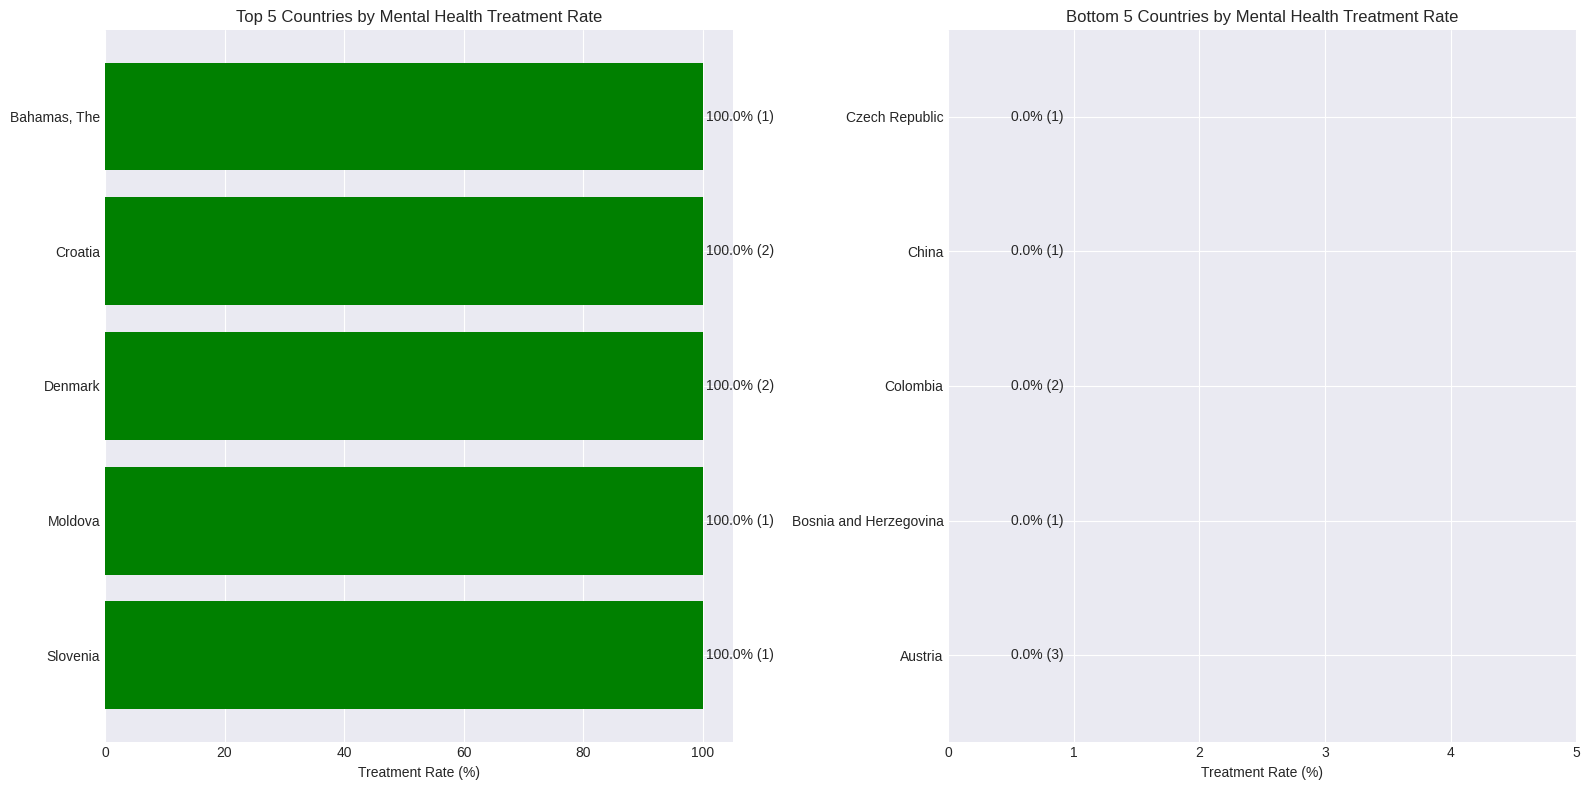

In [194]:
# The same code without setting sample size restrictions gives us a completely different result (without statistical rigor).

# === Top 5 y Bottom 5 Countries in Subplots (incluyendo n=1) ===

# No filtering: weuse all the countries
df_filtered = df.copy()

# Recalculate counts
country_counts_filtered = df_filtered['country'].value_counts()

# Calculate treatment rate (%)
country_dist = (
    df_filtered
        .groupby('country')['treatment']
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
).round(1)

# Select Top 5 and Bottom 5
top_5 = country_dist.sort_values(by='Yes', ascending=False).head(5)
bottom_5 = country_dist.sort_values(by='Yes').head(5)

# Get corresponding n
top_5_counts = pd.Series([country_counts_filtered[i] for i in top_5.index], index=top_5.index)
bottom_5_counts = pd.Series([country_counts_filtered[i] for i in bottom_5.index], index=bottom_5.index)

# Plot with subplots
fig, axes = plt.subplots(1, 2, figsize=(16,8), sharey=False)

# --- Top 5 subplot (left) ---
axes[0].barh(top_5.iloc[::-1].index, top_5['Yes'].iloc[::-1], color='green')
axes[0].set_xlabel('Treatment Rate (%)')
axes[0].set_title('Top 5 Countries by Mental Health Treatment Rate')
axes[0].set_xlim(0, top_5['Yes'].max() + 5)

for i, n in enumerate(top_5_counts.iloc[::-1]):
    width = top_5['Yes'].iloc[::-1].values[i]
    axes[0].text(width + 0.5, i, f'{width:.1f}% ({n})', va='center')

# --- Bottom 5 subplot (right) ---
axes[1].barh(bottom_5.index, bottom_5['Yes'], color='red')
axes[1].set_xlabel('Treatment Rate (%)')
axes[1].set_title('Bottom 5 Countries by Mental Health Treatment Rate')
axes[1].set_xlim(0, bottom_5['Yes'].max() + 5)

for i, n in enumerate(bottom_5_counts):
    width = bottom_5['Yes'].values[i]
    axes[1].text(width + 0.5, i, f'{width:.1f}% ({n})', va='center')

plt.tight_layout()
plt.show()

In [195]:
print(f'\nColumns names: {df.columns}')


Columns names: Index(['timestamp', 'age', 'country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'state_clean',
       'age_group', 'gender_clean'],
      dtype='object')


In [196]:
#next task.... convert appropiate columns to 'category' type for memory efficiency

# category_cols = ['self_employed', 'family_history', 'treatment', 'work_interfere', 'remote_work', 'tech_company', 'benefits', 'care_options',
#                  'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers',
#                  'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence' ]

# for col in category_cols:
#     df[col] = df[col].astype('category')
